In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_data.csv')

df['label'] = df.logerror.values

In [41]:
df['label'] =df['label'].map(lambda x: 0 if x<0 else 1)

In [42]:
df.label.value_counts()

1    50798
0    40013
Name: label, dtype: int64

In [3]:
month_label = df[['transaction_month', 'label']]

KeyError: "['transaction_month'] not in index"

In [7]:
pd.DataFrame(month_label.groupby('transaction_month')['label'].value_counts())

label
transaction_month label       
1                 1       3879
                  0       2695
2                 1       3728
                  0       2673
3                 1       4515
                  0       4237
4                 1       4976
                  0       4431
5                 1       5380
                  0       4676
6                 1       5959
                  0       5009
7                 1       5519
                  0       4465
8                 1       5863
                  0       4647
9                 1       5752
                  0       3845
10                1       3044
                  0       1947
11                1       1129
                  0        700
12                1       1054
                  0        688

In [8]:
month_label['label'].value_counts()

1    50798
0    40013
Name: label, dtype: int64

In [9]:
df_view = pd.DataFrame({'feature':df.columns.values, 'counts':df.count().values, 'unique_count':np.array([len(df[i].unique()) for i in df.columns])})

In [10]:
df_view

,counts,feature,unique_count
0,90811,ParcelId,90682
1,90811,logerror,1924
2,90811,transaction_month,12
3,90811,transaction_day,31
4,28781,airconditioningtypeid,7
5,261,architecturalstyletypeid,7
6,43,basementsqft,40
7,90275,bathroomcnt,24
8,90275,bedroomcnt,18
9,16,buildingclasstypeid,2


In [11]:
for i in df_view.index:
    if df_view.iloc[i].unique_count < 30:
        print(df_view.iloc[i].feature)
        print(df[df_view.iloc[i].feature].value_counts())

transaction_month
6     10968
8     10510
5     10056
7      9984
9      9597
4      9407
3      8752
1      6574
2      6401
10     4991
11     1829
12     1742
Name: transaction_month, dtype: int64
airconditioningtypeid
1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64
architecturalstyletypeid
7.0     221
8.0      16
2.0      11
21.0      8
3.0       4
10.0      1
Name: architecturalstyletypeid, dtype: int64
bathroomcnt
2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1165
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64
bedroomcnt
3.0     35447
2.0     22357
4.0     20279
5.0      5077
1.0      3897
0.0      1421
6.0      1120
8.0       274
7.0       234
9.0    

In [12]:
df_nan = df.copy()

In [13]:
df_nan.fillna(-1, inplace=True)

In [14]:
feature_list = [ 'transaction_month', 'transaction_day',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock']

In [15]:
df_nan[feature_list] = df_nan[feature_list].applymap(lambda x: 1 if  x==-1 else 0)

In [16]:
df_nan

,ParcelId,logerror,transaction_month,transaction_day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,label
0,11016594,0.0276,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,1
1,14366692,-0.1684,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,1,0
2,12098116,-0.0040,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,12643413,0.0218,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,1
4,14432541,-0.0050,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
5,11509835,-0.2705,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
6,12286022,0.0440,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,1
7,17177301,0.1638,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,1
8,14739064,-0.0030,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
9,14677559,0.0843,0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,1


In [94]:
for feature in feature_list:
    print(df_nan.groupby(feature)['label'].describe())
    print()

                     count      mean       std  min  25%  50%  75%  max
transaction_month                                                      
0                  90811.0  0.559382  0.496464  0.0  0.0  1.0  1.0  1.0

                   count      mean       std  min  25%  50%  75%  max
transaction_day                                                      
0                90811.0  0.559382  0.496464  0.0  0.0  1.0  1.0  1.0

                         count      mean       std  min  25%  50%  75%  max
airconditioningtypeid                                                      
0                      28781.0  0.575727  0.494241  0.0  0.0  1.0  1.0  1.0
1                      62030.0  0.551798  0.497314  0.0  0.0  1.0  1.0  1.0

                            count      mean       std  min  25%  50%  75%  max
architecturalstyletypeid                                                      
0                           261.0  0.567050  0.496436  0.0  0.0  1.0  1.0  1.0
1                         9055

In [91]:
pd.DataFrame(df_nan.groupby(feature_list[0])['label'].describe())

,count,mean,std,min,25%,50%,75%,max
transaction_month,,,,,,,,
0,90811.0,0.559382,0.496464,0.0,0.0,1.0,1.0,1.0


In [17]:
df_nan['label2'] = abs(df_nan.logerror.values)

In [18]:
for feature in feature_list:
    print('positive(1) or negative(0) ')
    print(df_nan.groupby(feature)['label'].describe())
    print()
    print('absolute logerror')
    print(df_nan.groupby(feature)['label2'].describe())
    print()
    

positive(1) or negative(0) 
                     count      mean       std  min  25%  50%  75%  max
transaction_month                                                      
0                  90811.0  0.559382  0.496464  0.0  0.0  1.0  1.0  1.0

absolute logerror
                     count      mean       std  min     25%     50%     75%  \
transaction_month                                                             
0                  90811.0  0.069317  0.148239  0.0  0.0139  0.0325  0.0695   

                     max  
transaction_month         
0                  4.737  

positive(1) or negative(0) 
                   count      mean       std  min  25%  50%  75%  max
transaction_day                                                      
0                90811.0  0.559382  0.496464  0.0  0.0  1.0  1.0  1.0

absolute logerror
                   count      mean       std  min     25%     50%     75%  \
transaction_day                                                             
0     

In [100]:
df_nan.label2.mean()

0.06931706070851187

In [40]:
x = df_nan[feature_list].values
y = df_nan.label.values

In [41]:
y.max()

1

In [64]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import cross_val_score



In [74]:
clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.5, 
                                      fit_intercept=True, intercept_scaling=1, class_weight=None,
                                      random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
                                      verbose=0, warm_start=False, n_jobs=-1)

scores = cross_val_score(clf, x, y, cv=5)

ValueError: Unknown label type: 'continuous'

array([ 0.56532511,  0.56235203,  0.5608655 ,  0.56026651,  0.56103739])

In [57]:
np.save('train_data.npy', x)
np.save('label.npy', y)

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
x = df_nan[feature_list].values
y = df_nan.label.values

In [24]:
dbscan = DBSCAN(eps=0.1, min_samples=1, metric='euclidean', algorithm='auto', leaf_size=30, p=None, n_jobs=-1)

In [1]:
x[0]

NameError: name 'x' is not defined

In [23]:
np.linalg.norm(x[0] - x[1])

3.1622776601683795

In [26]:
p = []

In [27]:
for i in range(x.shape[0]):
    p.append(str(x[i].tolist()))

In [30]:
p = np.array(p)

In [34]:
len(np.unique(p))

1178

In [35]:
k = np.unique(p)[0]

In [38]:
h = p.tolist()

In [42]:
dt = pd.Series(p)

In [47]:
r = dt.value_counts()

In [48]:
type(r)

pandas.core.series.Series

In [68]:
feature_list

['transaction_month',
 'transaction_day',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt'

In [19]:
p= df_nan[feature_list].astype('str').values

In [20]:
p = p.tolist()

In [21]:
for i in range(len(p)):
    p[i] = ''.join(p[i])

In [22]:
df_nan['uniques'] = p

In [23]:
k = df_nan['uniques'].value_counts().reset_index()

In [24]:
k['counts'] = k.values[:,1]

In [25]:
df_nan['uniques'].value_counts().tolist()

[11223,
 11132,
 7920,
 6581,
 4921,
 2859,
 2508,
 2330,
 1905,
 1878,
 1740,
 1729,
 1690,
 1199,
 1124,
 1004,
 972,
 892,
 790,
 784,
 753,
 623,
 599,
 593,
 586,
 537,
 536,
 461,
 450,
 421,
 404,
 398,
 377,
 375,
 343,
 337,
 330,
 319,
 311,
 299,
 292,
 277,
 258,
 254,
 249,
 228,
 223,
 220,
 213,
 211,
 208,
 202,
 194,
 192,
 188,
 187,
 186,
 184,
 183,
 174,
 165,
 160,
 158,
 152,
 151,
 142,
 141,
 141,
 139,
 130,
 129,
 126,
 123,
 118,
 116,
 112,
 110,
 108,
 108,
 106,
 106,
 106,
 102,
 99,
 98,
 92,
 92,
 91,
 87,
 86,
 85,
 81,
 80,
 79,
 78,
 77,
 76,
 72,
 72,
 69,
 69,
 68,
 67,
 67,
 66,
 65,
 65,
 64,
 64,
 62,
 62,
 61,
 61,
 61,
 59,
 58,
 57,
 56,
 56,
 56,
 56,
 56,
 56,
 55,
 55,
 53,
 52,
 52,
 51,
 51,
 50,
 50,
 50,
 46,
 46,
 45,
 45,
 44,
 43,
 42,
 42,
 42,
 41,
 40,
 40,
 40,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 36,
 35,
 35,
 34,
 33,
 33,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,

In [26]:
k = pd.DataFrame({'uniques':df_nan['uniques'].value_counts().index.tolist(),
                  'counts':df_nan['uniques'].value_counts().tolist() })

In [27]:
k['cluster'] = k.index

In [28]:
df = df_nan.merge(k[['uniques','cluster']], on='uniques')

In [158]:
df['label2'] = abs(df.logerror.values)

In [31]:
df.groupby('cluster')['label2'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,10980.0,0.056553,0.066002,0.0000,0.0149,0.03460,0.070400,0.3994
1,10826.0,0.062312,0.068826,0.0000,0.0169,0.03920,0.079000,0.3994
2,7799.0,0.048046,0.057927,0.0000,0.0129,0.02840,0.059200,0.3961
3,6506.0,0.047952,0.055961,0.0000,0.0131,0.03050,0.058700,0.3994
4,4845.0,0.052294,0.061117,0.0000,0.0141,0.03250,0.065800,0.3988
5,2804.0,0.047694,0.060101,0.0000,0.0119,0.02700,0.055725,0.3994
6,2469.0,0.052783,0.059623,0.0000,0.0141,0.03340,0.068600,0.3901
7,2267.0,0.060129,0.066453,0.0000,0.0161,0.03830,0.075800,0.3945
8,1864.0,0.057006,0.064703,0.0000,0.0159,0.03560,0.072600,0.3960


In [30]:
df = df.loc[df.logerror>-0.4]
df = df.loc[df.logerror<0.4]

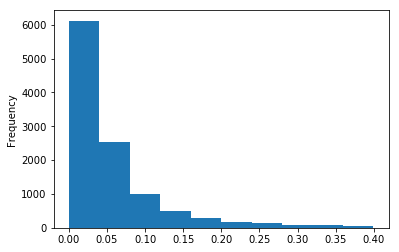

In [168]:
df.loc[df.cluster==0].label2.plot(kind='hist')

plt.show()

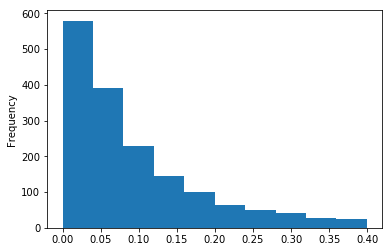

In [167]:
df.loc[df.cluster==10].label2.plot(kind='hist')

plt.show()

In [170]:
u = pd.DataFrame(df.groupby('cluster')['label2'].describe())

In [171]:
u.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [175]:
pd.DataFrame(df.groupby('cluster')['label2'].describe())

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,10980.0,0.056553,0.066002,0.0000,0.0149,0.03460,0.070400,0.3994
1,10826.0,0.062312,0.068826,0.0000,0.0169,0.03920,0.079000,0.3994
2,7799.0,0.048046,0.057927,0.0000,0.0129,0.02840,0.059200,0.3961
3,6506.0,0.047952,0.055961,0.0000,0.0131,0.03050,0.058700,0.3994
4,4845.0,0.052294,0.061117,0.0000,0.0141,0.03250,0.065800,0.3988
5,2804.0,0.047694,0.060101,0.0000,0.0119,0.02700,0.055725,0.3994
6,2469.0,0.052783,0.059623,0.0000,0.0141,0.03340,0.068600,0.3901
7,2267.0,0.060129,0.066453,0.0000,0.0161,0.03830,0.075800,0.3945
8,1864.0,0.057006,0.064703,0.0000,0.0159,0.03560,0.072600,0.3960


In [181]:
u.fillna(0, inplace=True)

In [183]:
u.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

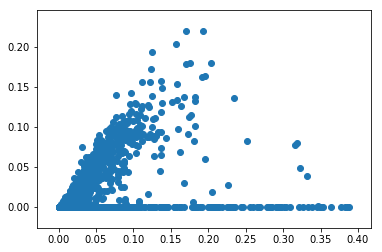

In [190]:
x = u[['mean', 'std']].values
plt.scatter(x[:,0], x[:,1])
plt.show()

In [46]:
df['uniques'] = p
df = df.merge(k[['uniques','cluster']], on='uniques')

In [44]:
df.fillna(-1, inplace=True)

In [49]:
h = df.loc[df.cluster==0]
h= h.loc[h.logerror>-0.4]
h = h.loc[h.logerror<0.4]

In [53]:
h['label2'] = abs(h.logerror)

In [60]:
h.groupby('transaction_month')['label'].mean()

transaction_month
1     0.569544
2     0.582915
3     0.510574
4     0.525541
5     0.509854
6     0.531130
7     0.535510
8     0.521912
9     0.561551
10    0.552674
11    0.561947
12    0.564444
Name: label, dtype: float64

In [61]:
h

,ParcelId,logerror,transaction_month,transaction_day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,label,uniques,cluster,label2
14685,12286022,0.0440,1,2,-1.0,-1.0,-1.0,1.0,2.0,-1.0,...,2015.0,46972.0,2304.97,-1,-1.0,6.037542e+13,1,0011100100110011110101110000111110000001001110...,0,0.0440
14686,10949761,0.0344,1,3,-1.0,-1.0,-1.0,2.0,3.0,-1.0,...,2015.0,40568.0,832.35,-1,-1.0,6.037311e+13,1,0011100100110011110101110000111110000001001110...,0,0.0344
14687,12339438,0.0526,1,3,-1.0,-1.0,-1.0,1.0,2.0,-1.0,...,2015.0,138057.0,2481.35,-1,-1.0,6.037554e+13,1,0011100100110011110101110000111110000001001110...,0,0.0526
14688,11510907,0.0639,1,3,-1.0,-1.0,-1.0,2.0,2.0,-1.0,...,2015.0,239140.0,5034.94,-1,-1.0,6.037621e+13,1,0011100100110011110101110000111110000001001110...,0,0.0639
14689,11403600,-0.1497,1,3,-1.0,-1.0,-1.0,2.0,2.0,-1.0,...,2015.0,44383.0,2054.31,-1,-1.0,6.037601e+13,0,0011100100110011110101110000111110000001001110...,0,0.1497
14690,12932190,-0.0010,1,4,-1.0,-1.0,-1.0,2.0,3.0,-1.0,...,2015.0,237396.0,4234.82,-1,-1.0,6.037404e+13,0,0011100100110011110101110000111110000001001110...,0,0.0010
14691,11427633,0.0296,1,4,-1.0,-1.0,-1.0,2.0,3.0,-1.0,...,2015.0,25064.0,4586.87,-1,-1.0,6.037603e+13,1,0011100100110011110101110000111110000001001110...,0,0.0296
14692,12755278,0.0526,1,4,-1.0,-1.0,-1.0,1.0,2.0,-1.0,...,2015.0,17111.0,850.71,-1,-1.0,6.037553e+13,1,0011100100110011110101110000111110000001001110...,0,0.0526
14693,12338963,0.3358,1,4,-1.0,-1.0,-1.0,1.0,2.0,-1.0,...,2015.0,174416.0,3763.56,-1,-1.0,6.037554e+13,1,0011100100110011110101110000111110000001001110...,0,0.3358
14694,12887934,0.0050,1,4,-1.0,-1.0,-1.0,1.0,2.0,-1.0,...,2015.0,150630.0,2478.39,-1,-1.0,6.037403e+13,1,0011100100110011110101110000111110000001001110...,0,0.0050


In [72]:
x = properties.values
y = h.logerror.values

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
properties = h[feature_list]

for c in properties.columns:
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [75]:
x.dtype

dtype('float64')

In [76]:
from sklearn.ensemble import GradientBoostingRegressor


In [91]:
gbdt = GradientBoostingRegressor(loss='ls', learning_rate=0.06, n_estimators=200, subsample=1.0,
                          criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                          min_weight_fraction_leaf=0.0, max_depth=6, min_impurity_split=1e-07,
                          init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
                          max_leaf_nodes=None, warm_start=False, presort='auto')

In [87]:
scores = cross_val_score(gbdt, x, y, cv=5)

In [92]:
gbdt.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.06, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [93]:
gbdt.predict(x)

array([ 0.02539588,  0.02915474,  0.02436526, ...,  0.00578057,
        0.01491664, -0.00585886])

In [94]:
abs(gbdt.predict(x) -y).mean()

0.04647340096651259

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

In [97]:
scores = cross_val_score(lr, x, y, cv=5)
print(scores)

[ -3.57005071e+01  -4.75434893e+03  -2.98177816e+00  -8.55298888e+00
  -3.65756763e+03]


In [99]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [100]:
abs(lr.predict(x) -y).mean()

0.056911745218579238

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [62]:
df = pd.read_csv('train_data.csv')
df['label'] =df['logerror'].map(lambda x: 0 if x<0 else 1)
df['label2'] = abs(df.logerror.values)
df = df.loc[df.logerror>-0.4]
df = df.loc[df.logerror<0.4]
df_nan = df.fillna(-1)
feature_list = [ 'transaction_month', 'transaction_day',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock']
df_nan[feature_list] = df_nan[feature_list].applymap(lambda x: 1 if  x==-1 else 0)

p= df_nan[feature_list].astype('str').values.tolist()
for i in range(len(p)):
    p[i] = ''.join(p[i])
df_nan['uniques'] = p
df['uniques'] = p
k = pd.DataFrame({'uniques':df_nan['uniques'].value_counts().index.tolist(),
                  'counts':df_nan['uniques'].value_counts().tolist() })
k['cluster'] = k.index

df = df.merge(k[['uniques','cluster']], on='uniques')

In [71]:
df.loc[df.cluster==0]
df.fillna(-1, inplace=True)
properties  = df.loc[df.cluster==0][feature_list[2:]]
for c in properties.columns:
    #properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

In [73]:
np.save('test.npy',properties.values)
np.save('test_label.npy', df.loc[df.cluster==0].logerror.values)

In [72]:
properties.shape

(10980, 57)

In [13]:
properties = df.loc[df.cluster==0]
properties.dropna(axis=1, inplace=True)

/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
properties.columns

Index(['ParcelId', 'logerror', 'transaction_month', 'transaction_day',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'label',
       'label2', 'uniques', 'cluster'],
      dtype='object')

In [15]:
for i in properties.columns:
    print(i,': ', len(properties[i].unique()))

ParcelId :  10967
logerror :  694
transaction_month :  12
transaction_day :  31
bathroomcnt :  6
bedroomcnt :  9
buildingqualitytypeid :  6
calculatedbathnbr :  6
calculatedfinishedsquarefeet :  2099
finishedsquarefeet12 :  2099
fips :  1
fullbathcnt :  6
heatingorsystemtypeid :  3
latitude :  10453
longitude :  10358
lotsizesquarefeet :  5630
propertycountylandusecode :  17
propertylandusetypeid :  5
propertyzoningdesc :  844
rawcensustractandblock :  7880
regionidcity :  118
regionidcounty :  1
regionidzip :  166
roomcnt :  1
unitcnt :  2
yearbuilt :  121
structuretaxvaluedollarcnt :  7848
taxvaluedollarcnt :  9068
assessmentyear :  1
landtaxvaluedollarcnt :  7666
taxamount :  10882
censustractandblock :  7888
label :  2
label2 :  652
uniques :  1
cluster :  1


In [16]:
label_list  = ['ParcelId', 'logerror', 'transaction_month', 'transaction_day', 'label',
       'label2', 'uniques', 'cluster']


In [17]:
labels =  properties[label_list]
dp = properties.drop(label_list, axis=1)

In [21]:
dummy_list = [i for i in dp.columns if 20>len(dp[i].unique())>1]

In [23]:
continuous_list = [i for i in dp.columns if len(dp[i].unique())>20]

In [24]:
continuous_list

['calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock']

In [25]:
for i in dummy_list:
    print(i, ":", dp[i].value_counts())

bathroomcnt : 2.0    5418
1.0    3953
3.0    1365
4.0     195
5.0      40
6.0       9
Name: bathroomcnt, dtype: int64
bedroomcnt : 3.0    5645
2.0    2789
4.0    1963
5.0     287
1.0     254
6.0      30
7.0       7
0.0       3
8.0       2
Name: bedroomcnt, dtype: int64
buildingqualitytypeid : 7.0     8453
4.0     2209
1.0      210
10.0      93
12.0      14
6.0        1
Name: buildingqualitytypeid, dtype: int64
calculatedbathnbr : 2.0    5418
1.0    3953
3.0    1365
4.0     195
5.0      40
6.0       9
Name: calculatedbathnbr, dtype: int64
fullbathcnt : 2.0    5418
1.0    3953
3.0    1365
4.0     195
5.0      40
6.0       9
Name: fullbathcnt, dtype: int64
heatingorsystemtypeid : 7.0     6273
2.0     4696
20.0      11
Name: heatingorsystemtypeid, dtype: int64
propertycountylandusecode : 0100    9862
010C     737
010E     177
010D     128
0101      18
010M      15
010H       9
0108       7
010G       6
010V       4
0109       4
012C       4
0104       4
01DC       2
0103       1
0110      

In [37]:
k = pd.get_dummies(dp[dummy_list].astype('str'))

In [42]:
u = dp[continuous_list]

In [46]:
cat_extension= ['propertyzoningdesc', 'regionidcity', 'regionidzip', 'yearbuilt' ]

In [ ]:
dc = dp[cat_extension]

In [50]:
u = dp[continuous_list].drop(cat_extension, axis=1)

In [52]:
t = dp['regionidcity'].astype('str')+dp['regionidzip'].astype('str')

In [55]:
t = pd.get_dummies(dp[cat_extension].astype('str'))

In [57]:
k.values.dtype

dtype('float64')

In [58]:
x = u.values
x = (x - x.mean(0))/x.std(0)

In [60]:
x.shape

(10980, 11)

In [61]:
np.save('d1.npy', k.values)
np.save('d2.npy', t.values)
np.save('d3.npy', x)
np.save('label.npy', labels['logerror'].values)

In [51]:
u.head(5)

,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock
14489,1297.0,1297.0,33899475.0,-118212720.0,6677.0,6.037542e+07,64549.0,111521.0,46972.0,2304.97,6.037542e+13
14490,1484.0,1484.0,34189804.0,-118339183.0,8214.0,6.037311e+07,29551.0,70119.0,40568.0,832.35,6.037311e+13
14491,640.0,640.0,33905332.0,-118152452.0,4376.0,6.037554e+07,44834.0,182891.0,138057.0,2481.35,6.037554e+13
14492,1137.0,1137.0,33865271.0,-118397145.0,7965.0,6.037621e+07,211236.0,450376.0,239140.0,5034.94,6.037621e+13
14493,1084.0,1084.0,33962616.0,-118360632.0,5005.0,6.037601e+07,84730.0,129113.0,44383.0,2054.31,6.037601e+13


In [41]:
u['propertyzoningdesc'].value_counts()

LCR1YY        366
LKR1YY        329
CORL*         222
NOR1YY        204
LCA106        197
LCR1*         181
MNRS          175
PRSF*         167
CARS*         167
LMR1*         142
BPR1*         138
DOR105        124
LCR175        120
BUR1YY        119
GAR1          117
LKR1*         112
POR17200*     110
LCRA06        105
RBR-1         104
GDR1          104
LCR2*         101
WCR1YY        100
CERS5000       94
WHR1YY         89
MPR1YY         89
LCA1YY         87
NOR1*          82
RPRS10000*     74
LCA1*          72
LRR17000*      72
             ... 
HBRPYY          1
LBR1M           1
RPRS10000S      1
GDR2            1
EMM2YY          1
BPC1*           1
NOR1            1
RMR3*           1
LARD1.5         1
SDDRA8000*      1
LCR175OO*       1
RMC1*           1
LCR3PY          1
ESR1**          1
WD4*            1
LVPR2D*         1
LARS            1
LCRA81/2        1
DOR18500*       1
EMR1CY          1
RMR3YY          1
POT1YY          1
AHR17000*       1
CMC1*           1
LHRA1     

In [44]:
import scipy as sp

In [45]:
x = properties.taxamount.values
y = properties.label2.values
print(np.corrcoef(x,y))


[[ 1.          0.01058756]
 [ 0.01058756  1.        ]]


In [41]:
pd.DataFrame(properties.groupby('censustractandblock')['label2'].describe())

label2
censustractandblock              
6.037121e+13        count  1.0000
                    mean   0.0305
                    std       NaN
                    min    0.0305
                    25%    0.0305
                    50%    0.0305
                    75%    0.0305
                    max    0.0305
                    count  1.0000
                    mean   0.0497
                    std       NaN
                    min    0.0497
                    25%    0.0497
                    50%    0.0497
                    75%    0.0497
                    max    0.0497
6.037124e+13        count  1.0000
                    mean   0.0131
                    std       NaN
                    min    0.0131
                    25%    0.0131
                    50%    0.0131
                    75%    0.0131
                    max    0.0131
6.037126e+13        count  1.0000
                    mean   0.3350
                    std       NaN
                    min    0.3350
                    25%    0.3350
                    50%    0.3350
...                           ...
6.037920e+13        std       NaN
                    min    0.0450
                    25%    0.0450
                    50%    0.0450
                    75%    0.0450
                    max    0.0450
6.037930e+13        count  1.0000
                    mean   0.0419
                    std       NaN
                    min    0.0419
                    25%    0.0419
                    50%    0.0419
                    75%    0.0419
                    max    0.0419
                    count  1.0000
                    mean   0.1684
                    std       NaN
                    min    0.1684
                    25%    0.1684
                    50%    0.1684
                    75%    0.1684
                    max    0.1684
                    count  1.0000
                    mean   0.0387
                    std       NaN
                    min    0.0387
                    25%    0.0387
                    50%    0.0387
                    75%    0.0387
                    max    0.0387

[63104 rows x 1 columns]

In [9]:
u.loc[u['std'].isnull(), 'std'] =u.loc[u['std'].isnull(), 'mean'] 

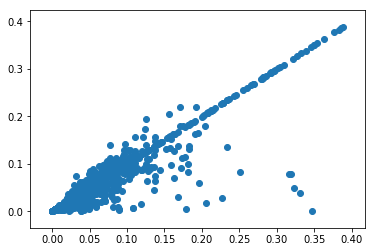

In [11]:
x = u[['mean', 'std']].values
plt.scatter(x[:,0], x[:,1])
plt.show()

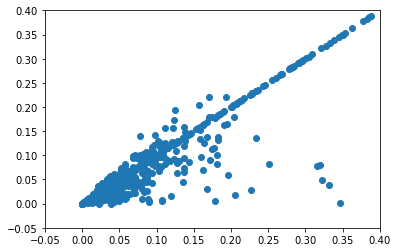

In [19]:
x = u.loc[u['count']<10][['mean', 'std']].values
plt.scatter(x[:,0], x[:,1])
plt.xlim(-0.05,0.4)
plt.ylim(-0.05,0.4)
plt.show()

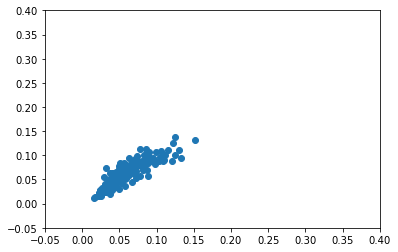

In [32]:
x = u.loc[u['count']>10][['mean', 'std']].values
plt.scatter(x[:,0], x[:,1])
plt.xlim(-0.05,0.4)
plt.ylim(-0.05,0.4)
plt.show()

In [31]:
(u['count']>10) & (u['count']<20)

cluster
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1121    False
1122    False
1123    False
1124    False
1125    False
1126    False
1127    False
1128    False
1129    False
1130    False
1131    False
1132    False
1133    False
1134    False
1135    False
1136    False
1137    False
1138    False
1139    False
1140    False
1141    False
1142    False
1143    False
1144    False
1145    False
1146    False
1147    False
1148    False
1149    False
1150    False
Name: count, Length: 1151, dtype: bool

In [29]:
True and True

True

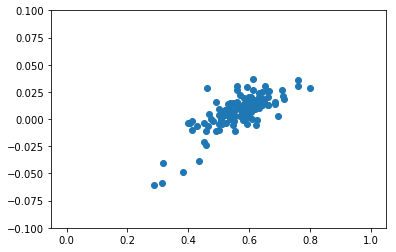

In [43]:
x = df.loc[df['cluster']<150].groupby('cluster')[['label','logerror']].mean().values
plt.scatter(x[:,0], x[:,1])
plt.xlim(-0.05,1.05)
plt.ylim(-0.1,0.1)
plt.show()

In [ ]:
x = df.loc[df['cluster']>50].groupby('cluster')[['label','logerror']].mean().values

In [63]:
z = df.loc[df['cluster']<150].groupby('cluster')['label'].mean()
x = df.loc[df['cluster']<150].groupby('cluster')['label2'].mean()
y = df.loc[df['cluster']<150].groupby('cluster')['label2'].std()

q = df.loc[df['cluster']>850].groupby('cluster')['label'].mean()
o = df.loc[df['cluster']>850].groupby('cluster')['label2'].mean()
p = df.loc[df['cluster']>850].groupby('cluster')['label2'].std()

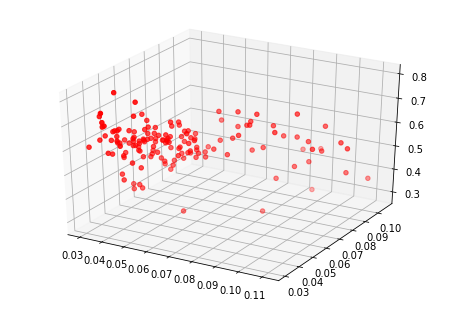

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z, color='r')
ax.scatter(o,p,q, color='b')
plt.show()

In [67]:
p

cluster
851    NaN
852    NaN
853    NaN
854    NaN
855    NaN
856    NaN
857    NaN
858    NaN
859    NaN
860    NaN
861    NaN
862    NaN
863    NaN
864    NaN
865    NaN
866    NaN
867    NaN
868    NaN
869    NaN
870    NaN
871    NaN
872    NaN
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879    NaN
880    NaN
        ..
1121   NaN
1122   NaN
1123   NaN
1124   NaN
1125   NaN
1126   NaN
1127   NaN
1128   NaN
1129   NaN
1130   NaN
1131   NaN
1132   NaN
1133   NaN
1134   NaN
1135   NaN
1136   NaN
1137   NaN
1138   NaN
1139   NaN
1140   NaN
1141   NaN
1142   NaN
1143   NaN
1144   NaN
1145   NaN
1146   NaN
1147   NaN
1148   NaN
1149   NaN
1150   NaN
Name: label2, Length: 300, dtype: float64

In [2]:
df = pd.read_csv('properties_2016.csv')

/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN


In [4]:
df.fillna(-1, inplace=True)

In [7]:
df.drop('parcelid', axis=1, inplace=True)

In [8]:
df = df.applymap(lambda x: 1 if  x==-1 else 0)

In [9]:
dq = df.applymap(lambda x: 0 if  x==-1 else 1)

In [14]:
df.head(4)

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,1,1,1,0,0,1,1,1,1,1,...,1,1,1,0,0,0,1,1,1,1
1,1,1,1,0,0,1,1,1,1,1,...,1,1,1,0,0,0,1,1,1,1
2,1,1,1,0,0,1,1,1,1,1,...,1,1,0,0,0,0,0,1,1,1
3,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,1,1,1


In [15]:
from sklearn.cluster import KMeans


In [23]:
km  = KMeans(n_clusters=20, init='k-means++', n_init=10,
             max_iter=300, tol=0.0001, precompute_distances='auto', 
             verbose=0, random_state=None, copy_x=False, n_jobs=1, algorithm='auto')

In [18]:
x = df.values

In [ ]:
km.fit(x)

In [25]:
plt.hist(km.labels_)
plt.show()

In [27]:
c = np.around(km.cluster_centers_)

In [30]:
pd.Series(km.labels_).value_counts().values

array([500185, 429886, 277398, 239853, 211232, 207865, 185703, 173849,
       112948,  90237,  83239,  80169,  79770,  76382,  73035,  61070,
        32075,  30074,  28810,  11437])

In [31]:
plt.plot(np.arange(20),pd.Series(km.labels_).value_counts().values)
plt.show()

In [33]:
x = dq.values

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt


#==============================================================================
# Main
#==============================================================================
pf = pd.read_csv('pf_.csv')
df = pd.read_csv('train_data.csv')
x = pf.values[:, 1:]
properties = pd.read_csv('train_data.csv')#

k = 100

km = KMeans(n_clusters=k, init='k-means++', n_init=10,
             max_iter=300, tol=0.0001, precompute_distances='auto', 
             verbose=0, random_state=9527, copy_x=False, n_jobs=1, 
             algorithm='auto')
print(km)

print('Start to fit...')
a = time.time()
km.fit(x)
b = time.time()
print('Clustering finished...')
print('Cost %d seconds' %np.around(b-a))

label_df = pd.DataFrame({
        'ParcelId': pf.ParcelId.values,
        'cluster':km.labels_,
        })

df = df.merge(label_df, on='ParcelId')
label_df.to_csv('cluster_label.csv', index=False)
print('Writing finished...')

properties = properties.merge(label_df, on='ParcelId')#

KMeans(algorithm='auto', copy_x=False, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=9527, tol=0.0001, verbose=0)
Start to fit...
Clustering finished...
Cost 529 seconds
Writing finished...


In [4]:
df = pd.read_csv('train_data.csv')
df = df.merge(label_df, on='ParcelId')

In [5]:
df.cluster.unique().shape

(19,)

In [2]:
centers = km.cluster_centers_
temp = label_df.cluster.value_counts()
extension_label = temp.loc[temp.values < label_df.shape[0]/(k*5)].index.tolist()

def l1_distance(a,b):
    return abs(a-b).sum()
    
replace_dict = {}
for name in extension_label:
    min_index =0
    min_distance=25555
    for i in range(centers.shape[0]):
        if i not in extension_label:
            if l1_distance(centers[i],centers[name]) < min_distance:
                min_distance = l1_distance(centers[i],centers[name])
                min_index = i
    replace_dict[str(name)]= min_index
    
label = label_df.cluster.values
for i in range(label.shape[0]):
    if label[i] in extension_label:
        label[i] =  replace_dict[str(label[i])]

In [18]:
label_df.cluster.unique().shape

(77,)

In [19]:
pq.cluster.unique().shape

(73,)

In [20]:
a = label_df.cluster.unique()
b = pq.cluster.unique()

In [25]:
list(set(a.tolist())-set(b.tolist()))

[9, 45, 13, 30]

In [31]:
pq.loc[pq.cluster.value_counts().values<200]

,ParcelId,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,cluster_x,cluster_y,cluster
68,10908638,0.0010,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,270803.0,2015.0,126624.0,3394.54,NaN,NaN,6.037143e+13,11,11,11
69,10953535,-0.0060,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,399435.0,2015.0,326782.0,4464.97,NaN,NaN,6.037310e+13,32,32,32
70,14246533,-0.0253,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,81459.0,2015.0,24413.0,4109.38,NaN,NaN,6.059076e+13,19,19,19
71,11267869,-0.0523,1.0,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,312483.0,2015.0,62496.0,4050.18,NaN,NaN,6.037910e+13,7,7,7
72,10746700,0.1467,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,338316.0,2015.0,279246.0,3550.56,NaN,NaN,6.037800e+13,47,47,47


In [39]:
p = pq.cluster.value_counts()

In [44]:
p.loc[p.values<200].index.tolist()

[83, 35, 87, 94, 17]

In [24]:
set(a)

{0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 47,
 49,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 87,
 91,
 93,
 94,
 97,
 98,
 99}

In [6]:
centers = km.cluster_centers_
temp = label_df.cluster.value_counts()
extension_label = temp.loc[temp.values < label_df.shape[0]/(k*10)].index.tolist()

In [6]:
np.unique(label).shape

(77,)

In [8]:
len(extension_label)

23

In [9]:
label_df.shape[0]/(k*5)

5970.434

In [13]:
def l1_distance(a,b):
    return abs(a-b).sum()
    
replace_dict = {}
for name in extension_label:
    min_index =0
    min_distance=25555
    for i in range(centers.shape[0]):
        if i not in extension_label:
            if l1_distance(centers[i],centers[name]) < min_distance:
                min_distance = l1_distance(centers[i],centers[name])
                min_index = i
    replace_dict[str(name)]= min_index
    
label = label_df.cluster.values

In [14]:
label_df['cluster'] = label
pq = df.merge(label_df, on='ParcelId')

In [16]:
pq['cluster'].unique().shape

(73,)

In [16]:
print(label_df.cluster.unique().shape)
print(label_df.cluster.value_counts())

(20,)
2     500058
5     429482
8     277404
11    237598
1     211228
14    207836
6     174492
0     161467
9     155909
3     114003
7      90225
15     88039
10     85744
17     59783
4      46900
16     41911
19     32075
12     30816
13     28810
18     11437
Name: cluster, dtype: int64


In [17]:
print(df.cluster.unique().shape)
print(df.cluster.value_counts())

(19,)
2     12409
5     12296
8      9436
14     7824
1      7714
11     7149
0      6820
9      5020
6      3491
15     3158
3      3083
17     2973
7      2790
10     2687
19     1204
13     1007
4       662
16      552
18      536
Name: cluster, dtype: int64


In [19]:
label_df.cluster.value_counts().describe()

count        20.00000
mean     149260.85000
std      133316.36813
min       11437.00000
25%       45652.75000
50%      102114.00000
75%      208684.00000
max      500058.00000
Name: cluster, dtype: float64

In [35]:
p = centers[1]- centers[2]

In [38]:
centers[:,0]

array([  1.24176078e+07,   1.67838328e+08,   7.73695029e+07,
         1.41797797e+07,   1.71847230e+07,   1.10275523e+07,
         1.28342616e+07,   1.17147406e+07,   1.39520593e+07,
         9.35771719e+07,   1.46759374e+07,   1.19474177e+07,
         1.14958569e+07,   1.08152861e+07,   1.62969536e+08,
         1.30343523e+07,   1.26324477e+07,   1.44201859e+07,
         1.12338688e+07,   1.21860957e+07])

In [11]:
def l1_distance(a,b):
    return abs(a-b).sum()
    
replace_dict = {}
for name in extension_label:
    min_index =0
    min_distance=25555
    print(name)
    for i in range(centers.shape[0]):
        if i not in extension_label:
            print(i, l1_distance(centers[i],centers[name]) )
            if l1_distance(centers[i],centers[name]) < min_distance:
                min_distance = l1_distance(centers[i],centers[name])
                min_index = i       

18
0 26.1718989019
1 29.99614161
2 28.0066372301
3 28.8141803286
4 17.7240085288
5 29.0109131465
6 27.5888006327
7 30.3111000277
8 28.9680033453
9 30.4911903739
10 30.5977910991
11 27.5651057669
12 17.2323543729
13 34.1289135717
14 31.6395956427
15 30.3396108543
16 25.1522952854
17 26.4886840741
19 30.3965705378


In [12]:
min_index

12

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt



pf = pd.read_csv('pf_.csv')
df = pd.read_csv('train_data.csv')
x = pf.values[:, 1:]
properties = pd.read_csv('train_data.csv')#


for i in range(2,8):
    k = i

    km = KMeans(n_clusters=k, init='k-means++', n_init=10,
                 max_iter=300, tol=0.0001, precompute_distances='auto', 
                 verbose=0, random_state=4396, copy_x=False, n_jobs=1, 
                 algorithm='auto')
    print(km)

    print('Start to fit...')
    a = time.time()
    km.fit(x)
    b = time.time()
    print('Clustering finished...')
    print('Cost %d seconds' %np.around(b-a))

    label_df = pd.DataFrame({
            'ParcelId': pf.ParcelId.values,
            'cluster':km.labels_,
            })

    pq = df.merge(label_df, on='ParcelId')
    print(pq.cluster.value_counts())


KMeans(algorithm='auto', copy_x=False, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=4396, tol=0.0001, verbose=0)
Start to fit...
Clustering finished...
Cost 33 seconds
1    58291
0    32520
Name: cluster, dtype: int64
KMeans(algorithm='auto', copy_x=False, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=4396, tol=0.0001, verbose=0)
Start to fit...
Clustering finished...
Cost 43 seconds
0    58209
1    31175
2     1427
Name: cluster, dtype: int64
KMeans(algorithm='auto', copy_x=False, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=4396, tol=0.0001, verbose=0)
Start to fit...
Clustering finished...
Cost 53 seconds
3    45326
1    31175
0    12892
2     1418
Name: cluster, dtype: int64
KMeans(algorithm='auto', copy_x=False, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1

In [5]:
label_df.cluster.value_counts()

1     640800
2     500706
0     365007
3     363777
9     277408
7     242415
8     202657
5     187029
10    104051
6      89930
4      11437
Name: cluster, dtype: int64

In [11]:
pq.cluster.value_counts()

2     12416
0     12298
8      9434
4      7824
9      7712
7      7377
1      6854
3      6226
14     5021
10     4681
11     3542
12     3226
13     2821
5       843
6       536
Name: cluster, dtype: int64

In [8]:
pq.groupby('cluster')['logerror'].describe()

cluster       
0        count    10459.000000
         mean         0.010505
         std          0.151816
         min         -2.976000
         25%         -0.019200
         50%          0.007000
         75%          0.037300
         max          1.662000
1        count    20001.000000
         mean         0.009097
         std          0.180363
         min         -4.510000
         25%         -0.031500
         50%          0.006000
         75%          0.041100
         max          4.737000
2        count    12416.000000
         mean         0.014486
         std          0.152585
         min         -2.365000
         25%         -0.030500
         50%          0.004000
         75%          0.042100
         max          3.174000
3        count    12844.000000
         mean         0.009084
         std          0.168890
         min         -4.605000
         25%         -0.031500
         50%          0.004000
                      ...     
7        std          0.